# Task 6 - Prediction using Decision Tree Algorithm

### Graduate Rotational Internship Program (GRIP) The Spark Foundation
### Data Science and Business Analytics Internship
### Author: Claudia Jocelyn Sutanto

The purpose of this task is to be able to predict the class (iris species) while creating decison tree classifier and visualize the given data.

## Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from IPython.display import Image
import pydotplus

In [2]:
#load dataset
df_iris= pd.read_csv("iris.csv")
df_iris.drop("Id", axis=1, inplace=True)
df_iris.head(2)

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## Preliminary Analysis

In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLength(cm)  150 non-null    float64
 1   SepalWidth(cm)   150 non-null    float64
 2   PetalLength(cm)  150 non-null    float64
 3   PetalWidth(cm)   150 non-null    float64
 4   Species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df_iris.columns.values

array(['SepalLength(cm)', 'SepalWidth(cm)', 'PetalLength(cm)',
       'PetalWidth(cm)', 'Species'], dtype=object)

In [6]:
df_iris.isnull().sum()

SepalLength(cm)    0
SepalWidth(cm)     0
PetalLength(cm)    0
PetalWidth(cm)     0
Species            0
dtype: int64

In [7]:
df_iris.describe()

,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preparation data 

In [8]:
X = df_iris[["SepalLength(cm)", "SepalWidth(cm)", "PetalLength(cm)", "PetalWidth(cm)"]]
y = df_iris["Species"]
features = list(df_iris.columns[:4])

The shapes of data:

In [9]:
X.shape

(150, 4)

In [10]:
y.shape

(150,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
X_train.shape

(100, 4)

In [13]:
X_test.shape

(50, 4)

In [14]:
y_train.shape

(100,)

In [15]:
y_test.shape

(50,)

## Visualizing

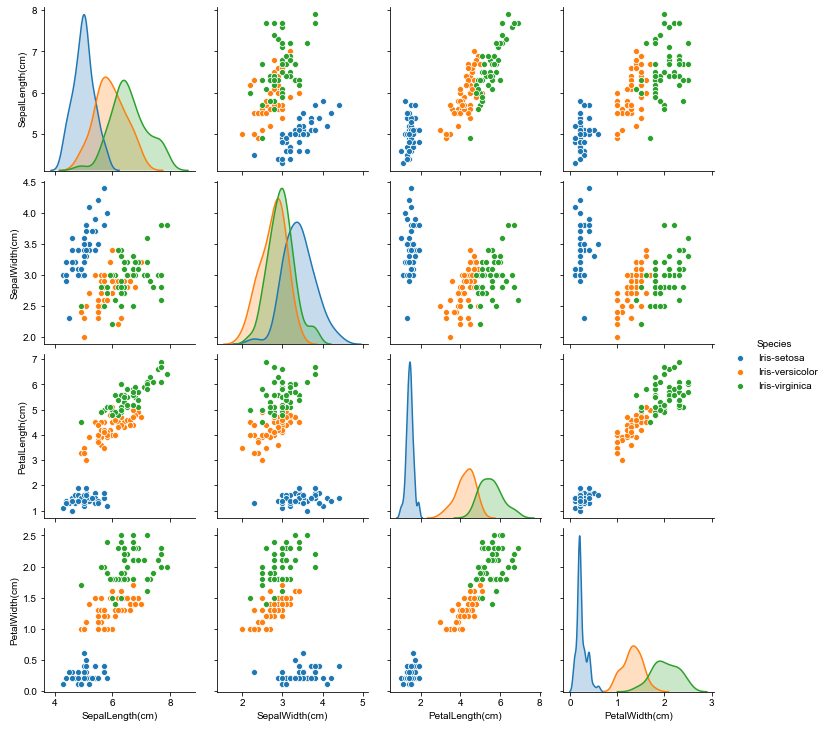

In [16]:
sns.pairplot(df_iris, hue="Species")
sns.set(rc={'figure.figsize':(10,7)})

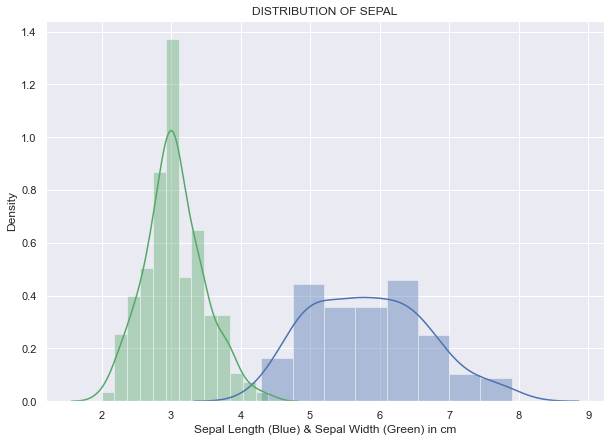

In [17]:
sns.distplot(X["SepalLength(cm)"], color="b")
sns.distplot(X["SepalWidth(cm)"], color="g")
plt.xlabel("Sepal Length (Blue) & Sepal Width (Green) in cm")
plt.ylabel("Density")
plt.title("DISTRIBUTION OF SEPAL")
sns.set(rc={"figure.figsize":(10,10)})

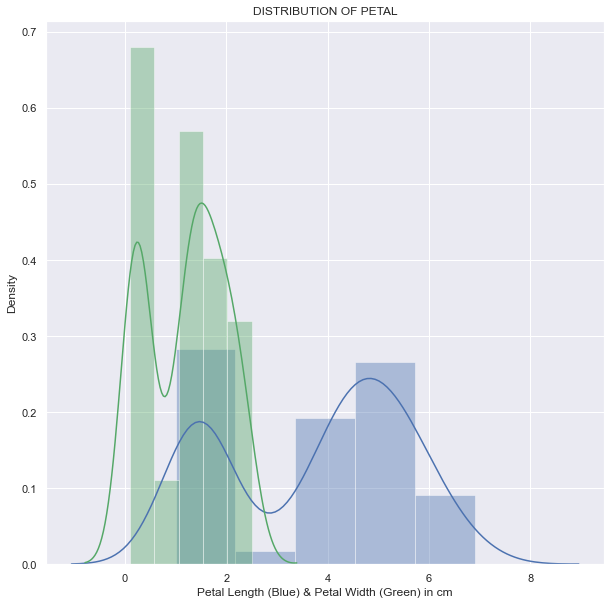

In [18]:
sns.distplot(X["PetalLength(cm)"], color="b") 
sns.distplot(X["PetalWidth(cm)"], color="g")
plt.xlabel("Petal Length (Blue) & Petal Width (Green) in cm")
plt.ylabel("Density")
plt.title("DISTRIBUTION OF PETAL")
sns.set(rc={"figure.figsize":(10,10)})

## Prediction and Modelling using Decision Tree

The decision tree can be used for classification and regression. The decision tree classifier will be used in this modeling since classification being used to predict discrete label while regression to predict continuous data.

In [19]:
model = DecisionTreeClassifier(criterion="gini", random_state=0)
model.fit(X_train, y_train)
print("Decision Tree Classifier Successfully Built")

Decision Tree Classifier Successfully Built


In [20]:
print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.96


The accuracy of training set is 100% because it's train the pure sepal and petal. The test set accuracy is quite good for making the prediction.

In [21]:
y_pred = model.predict(X_test)
print("Species prediction:")
print(y_pred)

Species prediction:
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica']


<b> Confusion Matrix </b>

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=["Iris-setosa","Iris-versicolor","Iris-virginica"])
cm

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]], dtype=int64)

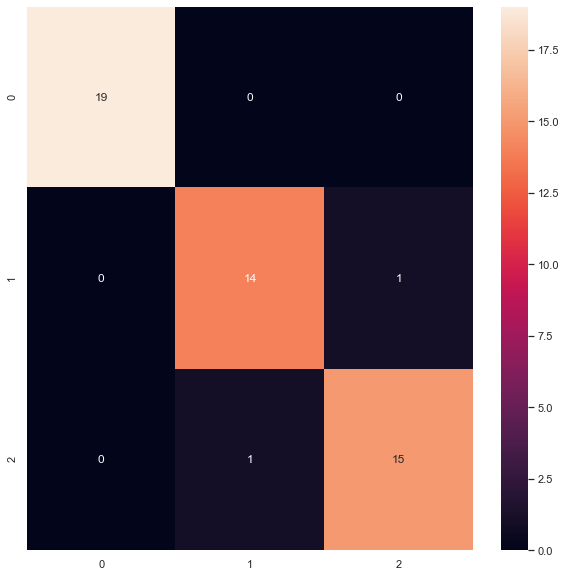

In [23]:
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot= True)

From the confusion matrix, it's shown the prediction and test is quite significant for classify the species class.

<b> Visualizing Decision Tree Classifier </b>

In [24]:
#Create DOT data
dot_data=tree.export_graphviz(model,out_file=None,
                             feature_names=features,
                             class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"])
#Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

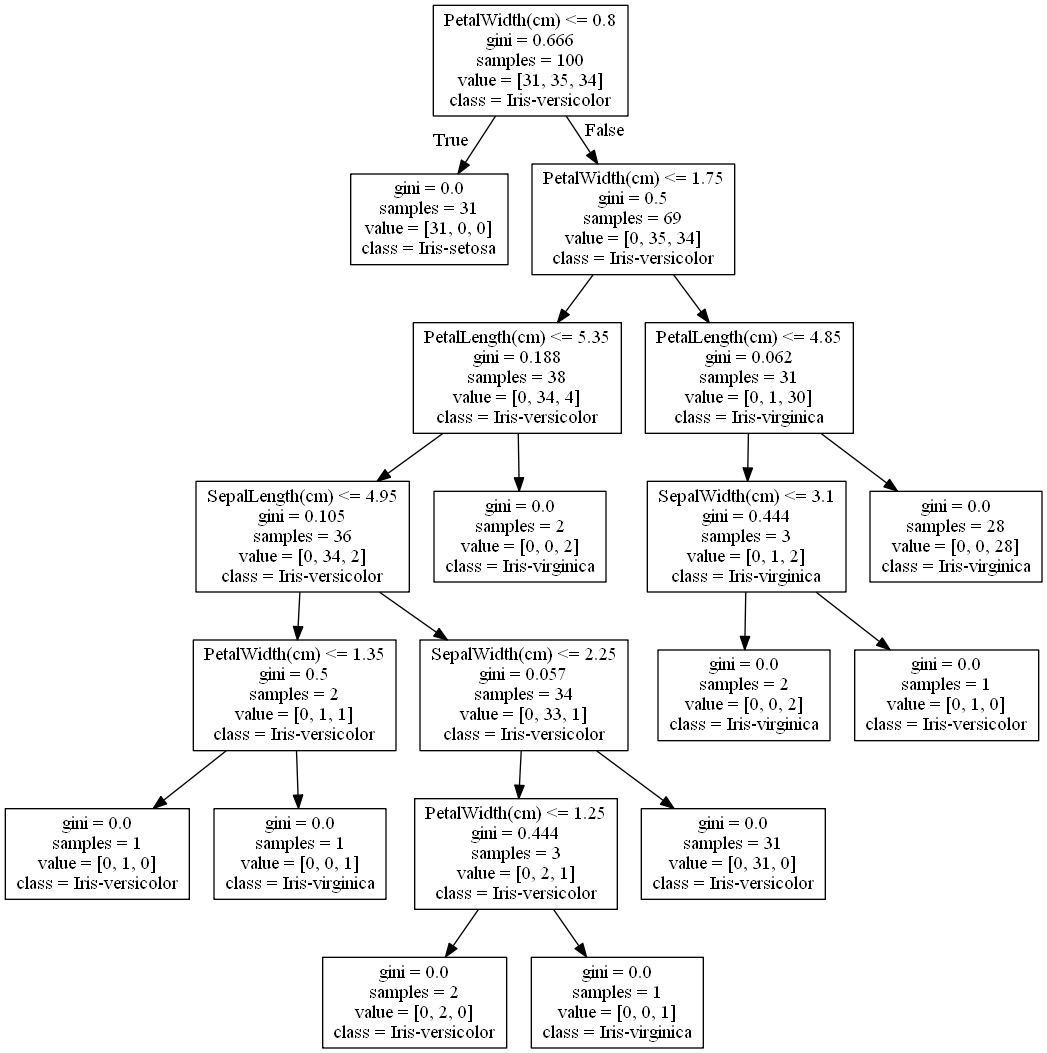

In [25]:
#Show graph
Image(graph.create_png())